# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [9]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("./data/retailmax.csv")

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

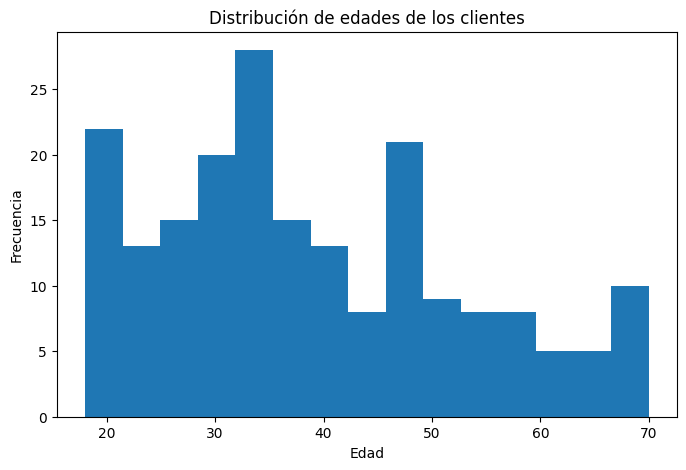

In [11]:
# Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=15)
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

<Figure size 800x500 with 0 Axes>

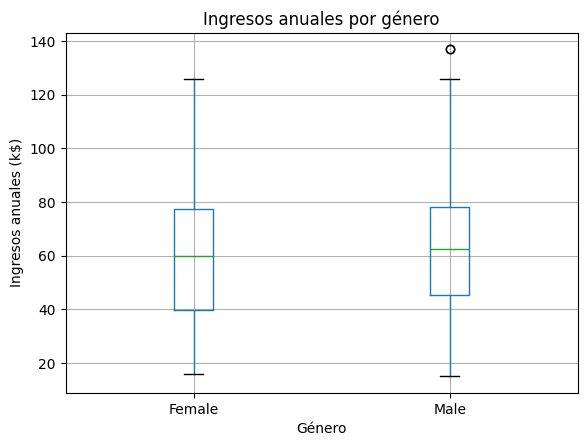

In [12]:
plt.figure(figsize=(8, 5))
df.boxplot(column="Annual Income (k$)", by="Gender")
plt.title("Ingresos anuales por género")
plt.suptitle("")  # Quita el título automático de pandas
plt.xlabel("Género")
plt.ylabel("Ingresos anuales (k$)")
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

<Figure size 800x500 with 0 Axes>

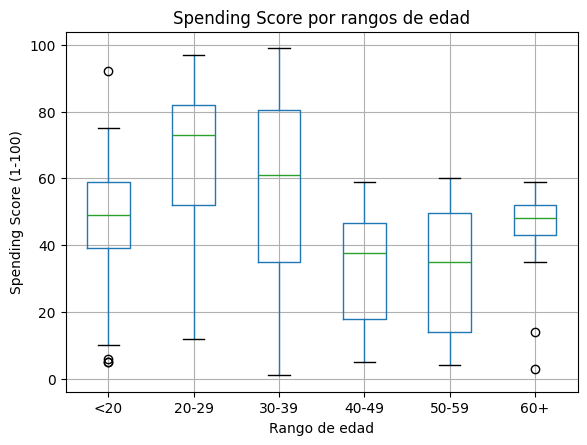

In [14]:
# Crear rangos de edad
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
df.boxplot(column="Spending Score (1-100)", by="AgeGroup")
plt.title("Spending Score por rangos de edad")
plt.suptitle("")  # quitar título automático
plt.xlabel("Rango de edad")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

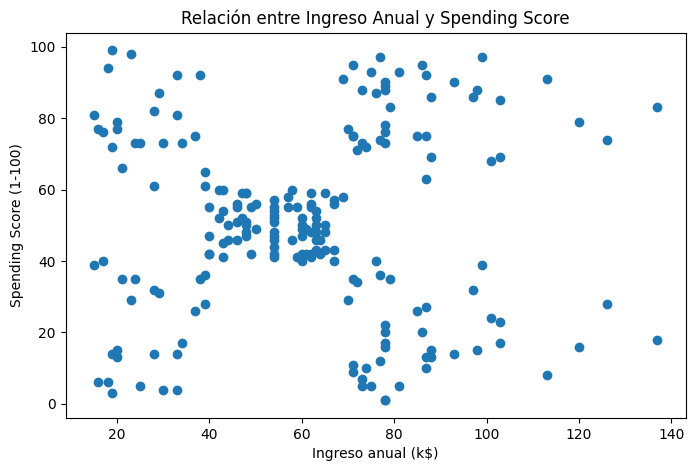

Coeficiente de correlación: 0.009902848094037608


In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.title("Relación entre Ingreso Anual y Spending Score")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# --- Cálculo de la correlación ---
correlacion = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"])
print("Coeficiente de correlación:", correlacion)

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

<Figure size 900x500 with 0 Axes>

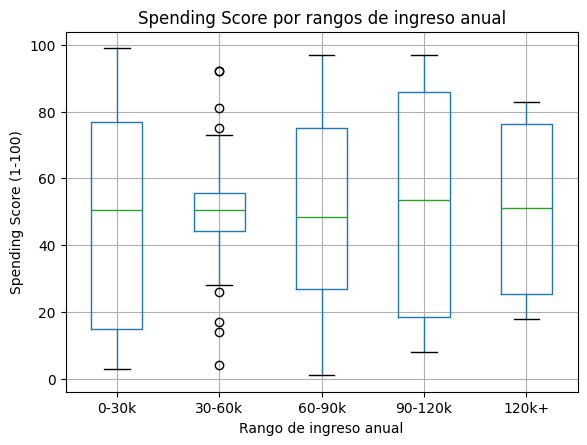

In [16]:
bins = [0, 30, 60, 90, 120, 200]   # ajusta si tus datos tienen otros valores
labels = ["0-30k", "30-60k", "60-90k", "90-120k", "120k+"]

df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=bins, labels=labels)

# Crear boxplot
plt.figure(figsize=(9, 5))
df.boxplot(column="Spending Score (1-100)", by="IncomeGroup")
plt.title("Spending Score por rangos de ingreso anual")
plt.suptitle("")   # elimina título adicional
plt.xlabel("Rango de ingreso anual")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

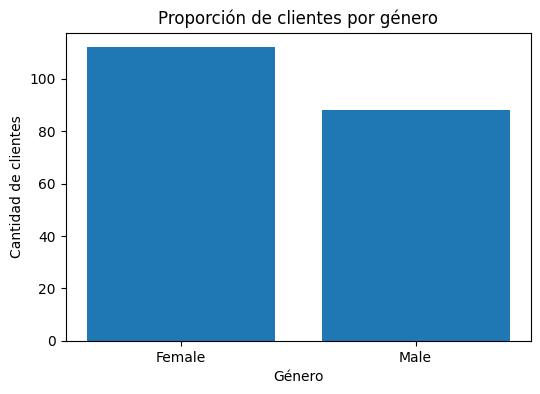

In [17]:
gender_counts = df["Gender"].value_counts()

# Gráfica de barras
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Proporción de clientes por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

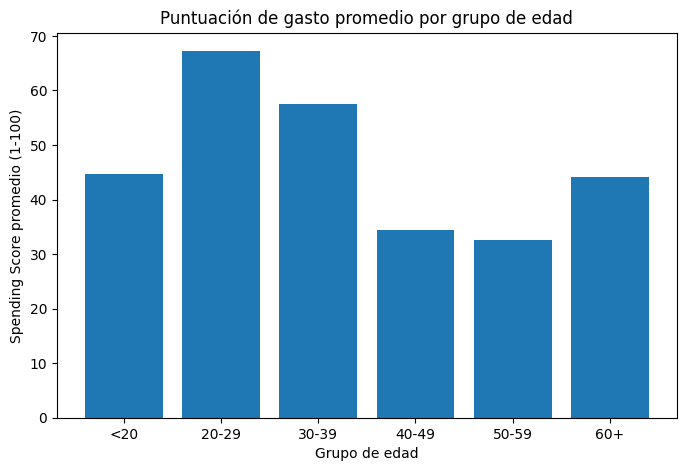

In [18]:
bins = [0, 20, 30, 40, 50, 60, 120]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Calcular promedio de Spending Score por grupo de edad
promedios = df.groupby("AgeGroup")["Spending Score (1-100)"].mean()

# Crear gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(promedios.index, promedios.values)
plt.title("Puntuación de gasto promedio por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Spending Score promedio (1-100)")
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

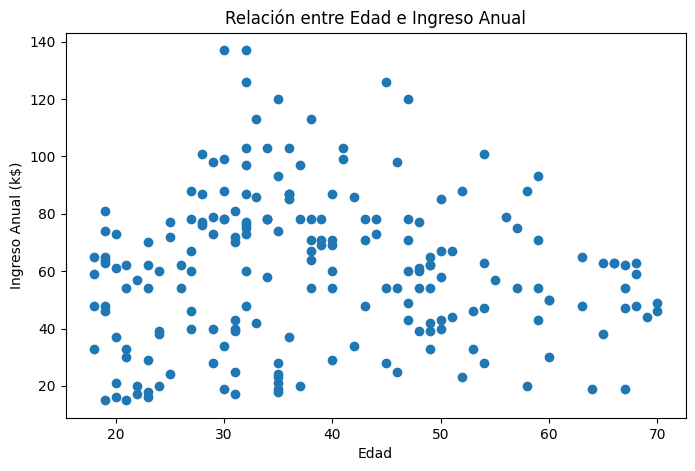

In [19]:
# Crear la gráfica de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.title("Relación entre Edad e Ingreso Anual")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

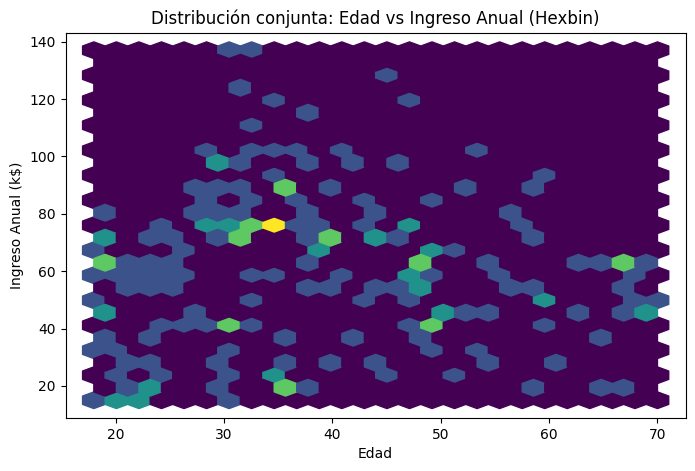

In [20]:
plt.figure(figsize=(8, 5))
plt.hexbin(df["Age"], df["Annual Income (k$)"], gridsize=25)
plt.title("Distribución conjunta: Edad vs Ingreso Anual (Hexbin)")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

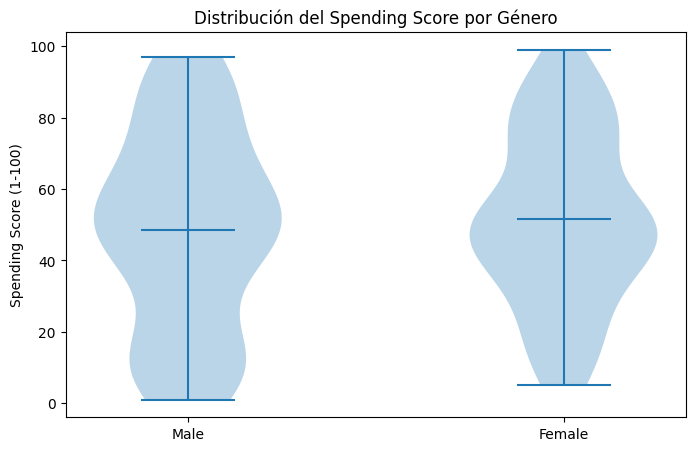

In [21]:
scores_m = df[df["Gender"] == "Male"]["Spending Score (1-100)"]
scores_f = df[df["Gender"] == "Female"]["Spending Score (1-100)"]

plt.figure(figsize=(8,5))

# Crear gráfico de violín
plt.violinplot([scores_m, scores_f], showmeans=True)

plt.title("Distribución del Spending Score por Género")
plt.xticks([1, 2], ["Male", "Female"])
plt.ylabel("Spending Score (1-100)")

plt.show()